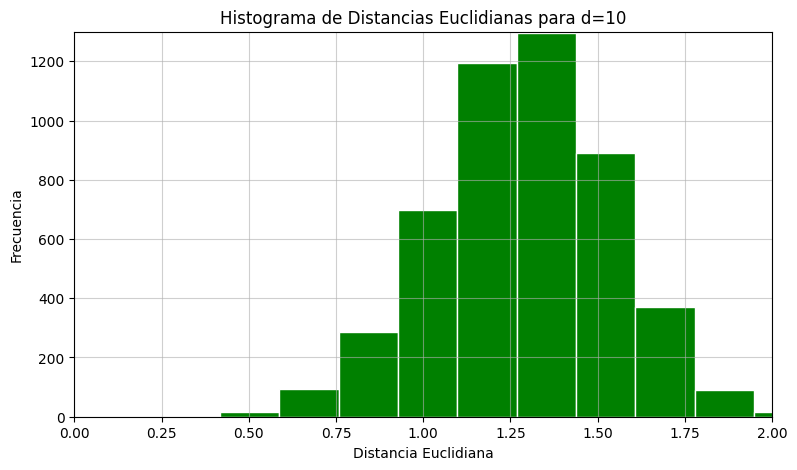

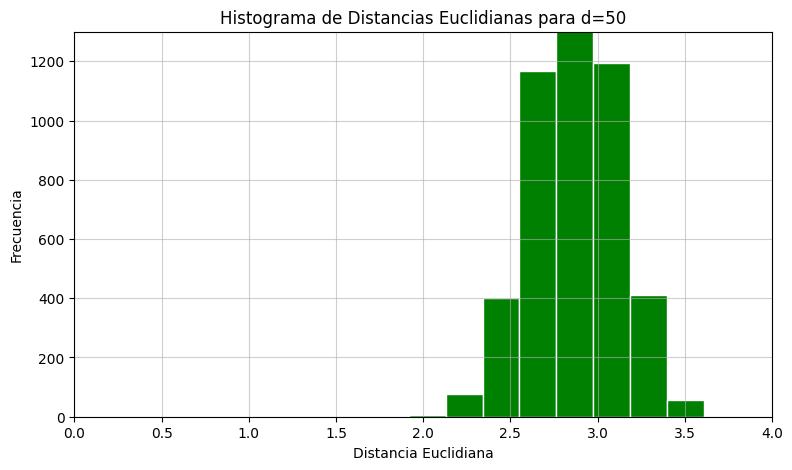

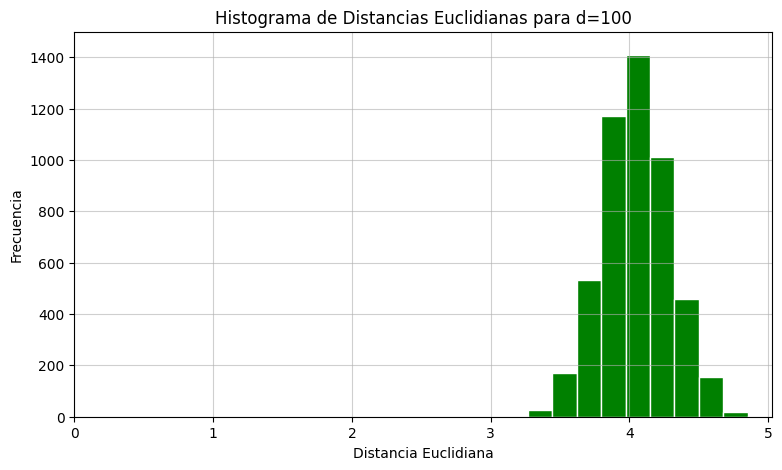

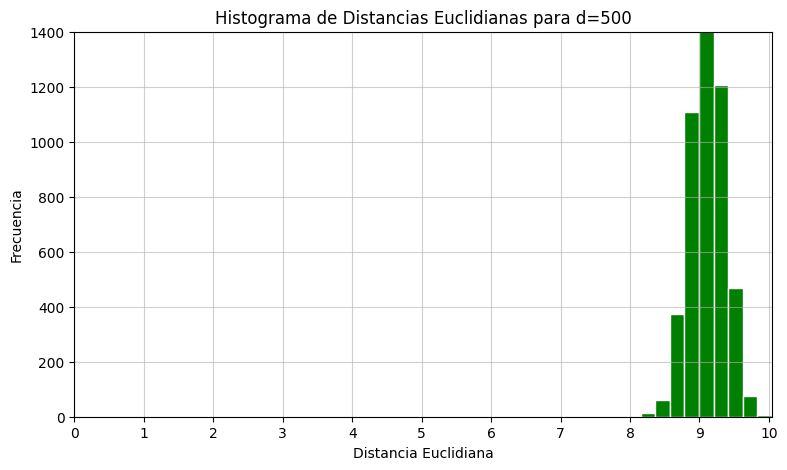

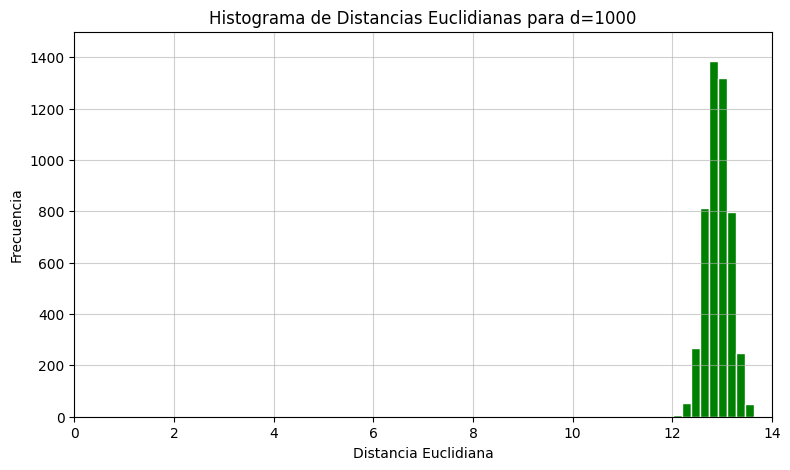

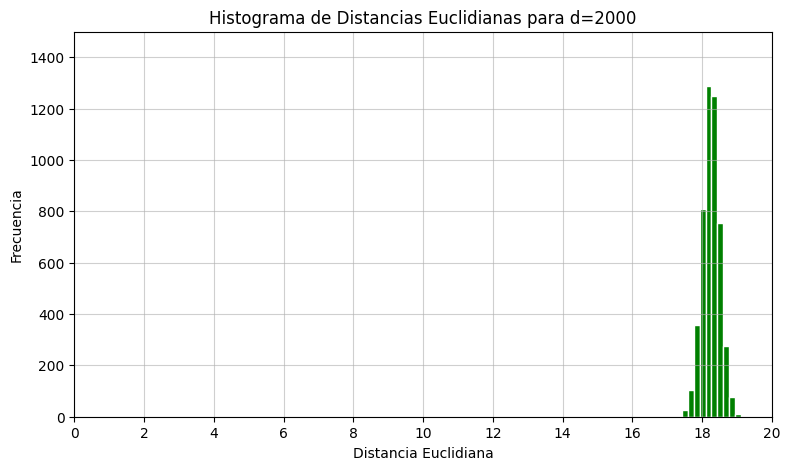

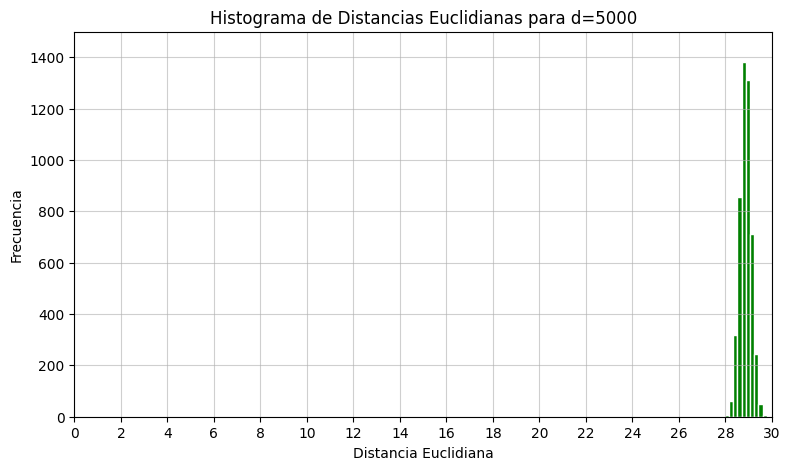

In [77]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear una carpeta para guardar los histogramas
os.makedirs("histogramas", exist_ok=True)  # Crea la carpeta si no existe

# Lista de dimensiones a graficar
dimensiones = [10, 50, 100, 500, 1000, 2000, 5000]

# Configuración específica para cada dimensión
configuracion = {
    10: {"bin_size": 0.25, "xlim_max": 2, "ylim_max": 1300},
    50: {"bin_size": 0.5, "xlim_max": 4, "ylim_max": 1300},
    100: {"bin_size": 1, "ylim_max": 1500},
    500: {"bin_size": 1, "ylim_max": 1400},
    1000: {"bin_size": 2, "ylim_max": 1500},
    2000: {"bin_size": 2, "xlim_max": 20, "ylim_max": 1500},
    5000: {"bin_size": 2, "xlim_max": 30, "ylim_max": 1500},
}

# Leer y graficar cada archivo CSV por separado
for d in dimensiones:
    # Leer el archivo CSV
    data = pd.read_csv(f"distancias_{d}.csv")

    # Obtener valores de configuración
    bin_size = configuracion[d]["bin_size"]
    xlim_max = configuracion[d].get("xlim_max", data["Distancia"].max())  # Si no está definido, usa el máximo
    ylim_max = configuracion[d]["ylim_max"]

    # Crear la figura antes de graficar
    plt.figure(figsize=(9, 5))

    # Crear el histograma
    plt.hist(data["Distancia"], bins=10, color='g', edgecolor="white")

    # Configurar etiquetas y título
    plt.xlabel("Distancia Euclidiana")
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de Distancias Euclidianas para d={d}")

    # Fijar el límite del eje X
    plt.xlim(0, xlim_max)

    # Fijar el límite del eje Y
    plt.ylim(0, ylim_max)

    # Ajustar marcas en el eje X
    plt.xticks(np.arange(0, xlim_max + 0.25, bin_size))

     # Agregar cuadrícula con líneas punteadas
    plt.grid(True, linestyle="-", alpha=0.6)

    # Guardar la figura antes de mostrarla
    plt.savefig(f"histogramas/histograma_{d}.png", dpi=300, bbox_inches='tight')

    # Mostrar el gráfico
    plt.show()

    # Cerrar la figura para liberar memoria
    plt.close()
